In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/home/rupamay/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df_raw1= pd.read_csv("IoTPond11.csv", delimiter = ",",low_memory=False)

In [3]:
df_raw1.head(5)

,created_at,entry_id,TEMPERATURE,TURBIDITY,DISOLVED OXYGEN,pH,AMMONIA,NITRATE,Population,Lenght,Weight
0,2021-06-25 15:14:07 CET,1,27.0625,100,22.562,8.20213,12151.86328,1061,50,14.12,33.8
1,2021-06-25 15:14:26 CET,2,27.1250,100,20.493,8.19759,15100.59473,1050,50,14.12,33.8
2,2021-06-25 15:15:42 CET,3,27.1250,100,12.555,8.20213,42010.77344,1039,50,14.12,33.8
3,2021-06-25 15:16:01 CET,4,27.0625,100,17.403,8.19759,21075.64453,1037,50,14.12,33.8
4,2021-06-25 15:16:21 CET,5,27.1250,100,22.765,8.21121,62079.92578,1039,50,14.12,33.8


In [4]:
df_raw1.drop("entry_id",axis=1,inplace=True)

In [5]:
df_raw1.columns=['created_at', 'Temperature', 'Turbidity',
       'Dissolved Oxygen', 'PH', 'Ammonia', 'Nitrate', 'Population',
        'Fish_Length', 'Fish_Weight']

In [6]:
df_raw1.head(5)

,created_at,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight
0,2021-06-25 15:14:07 CET,27.0625,100,22.562,8.20213,12151.86328,1061,50,14.12,33.8
1,2021-06-25 15:14:26 CET,27.1250,100,20.493,8.19759,15100.59473,1050,50,14.12,33.8
2,2021-06-25 15:15:42 CET,27.1250,100,12.555,8.20213,42010.77344,1039,50,14.12,33.8
3,2021-06-25 15:16:01 CET,27.0625,100,17.403,8.19759,21075.64453,1037,50,14.12,33.8
4,2021-06-25 15:16:21 CET,27.1250,100,22.765,8.21121,62079.92578,1039,50,14.12,33.8


In [7]:
df_raw1.dtypes

created_at           object
Temperature         float64
Turbidity             int64
Dissolved Oxygen    float64
PH                  float64
Ammonia             float64
Nitrate               int64
Population            int64
Fish_Length         float64
Fish_Weight         float64
dtype: object

From 10/10/21 to 3/2/2022 , there is 1 record per day with all sensor readings but the weight readings are 281.2. 
Dropping them. Also , the rest of the records too do not have any sequence in them to map weight differences, dropping them.

In [11]:
df_raw1.iloc[743]

created_at          3/2/2022
Temperature          27.1875
Turbidity                100
Dissolved Oxygen         0.0
PH                    8.1295
Ammonia                  0.0
Nitrate                 1066
Population                50
Fish_Length            32.46
Fish_Weight            281.2
Name: 743, dtype: object

In [12]:
df_raw1.iloc[627]

created_at           10/10/2021
Temperature             27.0625
Turbidity                   100
Dissolved Oxygen         22.562
PH                      8.20213
Ammonia             12151.86328
Nitrate                    1061
Population                   50
Fish_Length               32.46
Fish_Weight               281.2
Name: 627, dtype: object

In [15]:
index_list = list(range(627, 3165))
df_raw1.drop(df_raw1.index[index_list], inplace =True)

In [16]:
df_raw1.tail(5)

,created_at,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight
622,2021-07-08 17:06:20 CET,26.75,100,5.315,7.19891,2875.26587,628,50,15.684286,40.928571
623,2021-07-08 17:07:08 CET,26.75,100,6.526,7.30786,493.19696,589,50,15.684286,40.928571
624,2021-07-08 17:07:28 CET,26.75,100,8.818,7.22161,365.02359,625,50,15.684286,40.928571
625,2021-07-08 17:07:48 CET,26.75,100,10.059,7.19891,184.68935,644,50,15.684286,40.928571
626,2021-07-08 17:09:22 CET,26.75,100,8.315,7.25338,92.80393,626,50,15.684286,40.928571


<AxesSubplot:>

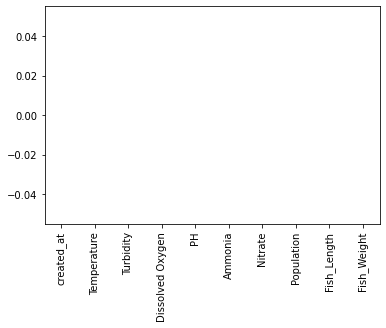

In [17]:
df_raw1.isna().sum().plot.bar()

No missing record.

In [18]:
df_raw1['Datetime'] = pd.to_datetime(df_raw1.created_at,infer_datetime_format=True)

/home/rupamay/anaconda3/lib/python3.8/site-packages/dateutil/parser/_parser.py:1213: UnknownTimezoneWarning: tzname CET identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [19]:
df_raw1.drop(columns='created_at', axis=1,inplace=True)

In [20]:
df_raw1['Date'] = df_raw1['Datetime'].dt.date
df_raw1['Time'] = df_raw1['Datetime'].dt.time

In [21]:
df_raw1.head(5)

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime,Date,Time
0,27.0625,100,22.562,8.20213,12151.86328,1061,50,14.12,33.8,2021-06-25 15:14:07,2021-06-25,15:14:07
1,27.1250,100,20.493,8.19759,15100.59473,1050,50,14.12,33.8,2021-06-25 15:14:26,2021-06-25,15:14:26
2,27.1250,100,12.555,8.20213,42010.77344,1039,50,14.12,33.8,2021-06-25 15:15:42,2021-06-25,15:15:42
3,27.0625,100,17.403,8.19759,21075.64453,1037,50,14.12,33.8,2021-06-25 15:16:01,2021-06-25,15:16:01
4,27.1250,100,22.765,8.21121,62079.92578,1039,50,14.12,33.8,2021-06-25 15:16:21,2021-06-25,15:16:21


Sort DataFrame by Date (Datetime)

In [22]:
df=df_raw1.sort_values(by='Datetime') 

In [ ]:
# df_raw1 = df_raw1.dropna()
#clean up missing data here
# df.ffill(axis=0,inplace=True)

In [23]:
# use datetime_is_numeric = True to get statistics on the datetime column
desc = df.describe(datetime_is_numeric = True)

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime
count,627.0000,627.0000,627.0000,627.0000,627.0000,627.0000,627.0000,627.0000,627.0000,627
mean,25.6541,100.0000,3.3362,7.2901,1203286459.6109,706.7193,50.0000,15.4438,39.7517,2021-07-07 09:50:00.905901056
min,24.3750,100.0000,0.0000,7.1898,0.1734,480.0000,50.0000,14.1200,33.8000,2021-06-25 15:14:07
25%,25.1875,100.0000,0.0000,7.2352,277.9381,629.0000,50.0000,15.3714,39.3429,2021-07-07 19:32:12
50%,25.5000,100.0000,0.0000,7.2398,7125.1328,656.0000,50.0000,15.3714,39.3429,2021-07-07 23:38:48
75%,26.1875,100.0000,4.6270,7.2443,173163.5782,708.5000,50.0000,15.6843,40.9286,2021-07-08 08:10:41.500000
max,27.2500,100.0000,33.4750,8.2203,427000000000.0000,2165.0000,50.0000,15.6843,40.9286,2021-07-08 17:09:22
std,0.7186,0.0000,5.9733,0.2109,18178161911.6460,167.4747,0.0000,0.3473,1.6015,NaN


We have 627 records in total. 

In [25]:
d=df["Date"].unique()
print(len(d))
d

3


array([datetime.date(2021, 6, 25), datetime.date(2021, 7, 7),
       datetime.date(2021, 7, 8)], dtype=object)

In [26]:
a=df["Fish_Weight"].unique()
print(len(a))
a

3


array([33.8       , 39.34285716, 40.92857145])

In [28]:
for i in range(len(date_group)):
    print(d[i],'-----------> ',date_group.get_group(d[i])["Fish_Weight"].unique())

2021-06-25 ----------->  [33.8]
2021-07-07 ----------->  [39.34285716]
2021-07-08 ----------->  [40.92857145]


Not pursuing cleaning this dataset furthur.